In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/2023-08-07 04.00.00")

In [4]:
extension = 'csv'

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

#Vehicle tasks
bikes_filenames= [i for i in glob.glob('autonomousBike_trip_*.{}'.format(extension))]

In [5]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

In [70]:
df_total_bikes = []

for f in bikes_filenames:
 temp_f = pd.read_csv(f)
 df_total_bikes.append(temp_f)

df_bike = pd.read_csv(bikes_filenames[3])

print(bikes_filenames[3])

autonomousBike_trip_event16_41_56.csv


In [7]:
df_bike

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,PackBidCt,PackBidDist,PackBidQueue,...,Event,Activity,Message,Start Time,End Time,Duration (min),Distance Traveled,Start Battery %,End Battery %,Battery Gain %
0,0,7,00:00:00,164,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,7,00:00:00,164,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7,00:00:00,164,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7,00:00:00,164,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7,00:00:00,164,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186239,20094,13,23:27:00,306,70000.0,8.0,0,100.0,0.01,2.0,...,END: in_use_packages,0,Usedpackage(30076),23:16:30,23:27:00,10.5,1333.445317,86.694846,84.585765,-2.109081
186240,20095,13,23:27:30,306,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186241,20095,13,23:27:30,306,70000.0,8.0,0,100.0,0.01,2.0,...,START: wandering,0,nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186242,20101,13,23:30:30,306,70000.0,8.0,0,100.0,0.01,2.0,...,END: in_use_packages,0,Usedpackage(30077),23:17:00,23:30:30,13.5,1738.252646,97.233672,94.684441,-2.549231


In [8]:
# Extract the day from the 'starttime' column
df_bike['Day'] = df_bike['Day'] - 6

# Round down 'start_time' column to nearest 15 minutes
df_bike['start_time_ed'] = pd.to_datetime(df_bike['Time']).dt.floor('15Min')

# Group the data by day and 15-minute intervals and count the number of rows
counts_activities= df_bike.groupby(['Day', 'start_time_ed','Event']).size().reset_index(name='count')

# Format the datetime columns
counts_activities['x_datetime'] = counts_activities['Day'].astype(str) + ', ' + counts_activities['start_time_ed'].dt.strftime('%H:%M:%S')


In [9]:
counts_activities

,Day,start_time_ed,Event,count,x_datetime
0,1,2023-08-10 00:00:00,START: wandering,164,"1, 00:00:00"
1,1,2023-08-10 01:15:00,END: picking_up_packages,1,"1, 01:15:00"
2,1,2023-08-10 01:15:00,END: wandering,1,"1, 01:15:00"
3,1,2023-08-10 01:15:00,START: in_use_packages,1,"1, 01:15:00"
4,1,2023-08-10 01:15:00,START: picking_up_packages,1,"1, 01:15:00"
...,...,...,...,...,...
4110,7,2023-08-10 23:15:00,START: in_use_packages,4,"7, 23:15:00"
4111,7,2023-08-10 23:15:00,START: picking_up_packages,1,"7, 23:15:00"
4112,7,2023-08-10 23:15:00,START: wandering,4,"7, 23:15:00"
4113,7,2023-08-10 23:30:00,END: in_use_packages,1,"7, 23:30:00"


In [10]:
# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.Series(range(1, 8))
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_counts_activities= pd.DataFrame(index=index).reset_index()

In [11]:
# Set the index of df_counts_food
df_counts_activities['x_datetime'] = df_counts_activities['day'].astype(str) + ', ' + df_counts_activities['start_time_ed'].dt.strftime('%H:%M:%S')

In [12]:
# Merge the counts with the complete DataFrame to fill missing values with zeros
df_counts_activities= pd.merge(df_counts_activities, counts_activities[['x_datetime', 'count', 'Event']], how='left', left_on=['x_datetime'], right_on=['x_datetime']).fillna({'count': 0})


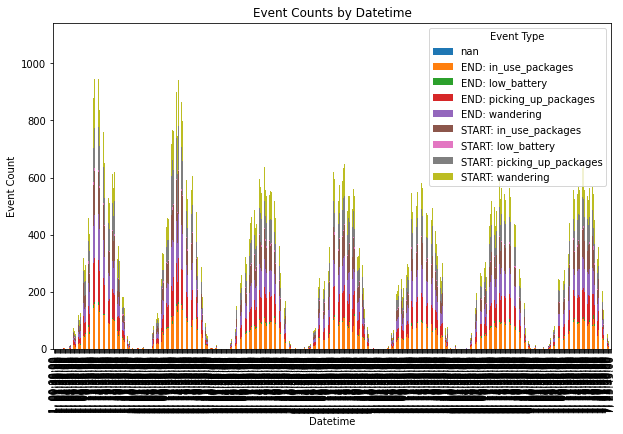

In [13]:
# Pivot the table to have x_datetime as index, Event types as columns, and counts as values
pivot_table = df_counts_activities.pivot(index='x_datetime', columns='Event', values='count')

# Plot the pivot_table
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Event Counts by Datetime')
plt.xlabel('Datetime')
plt.ylabel('Event Count')
plt.legend(title='Event Type')
plt.show()

In [14]:
event_types = df_counts_activities['Event'].unique()
print(event_types)

['START: wandering' nan 'END: picking_up_packages' 'END: wandering'
 'START: in_use_packages' 'START: picking_up_packages'
 'END: in_use_packages' 'END: low_battery' 'START: low_battery']


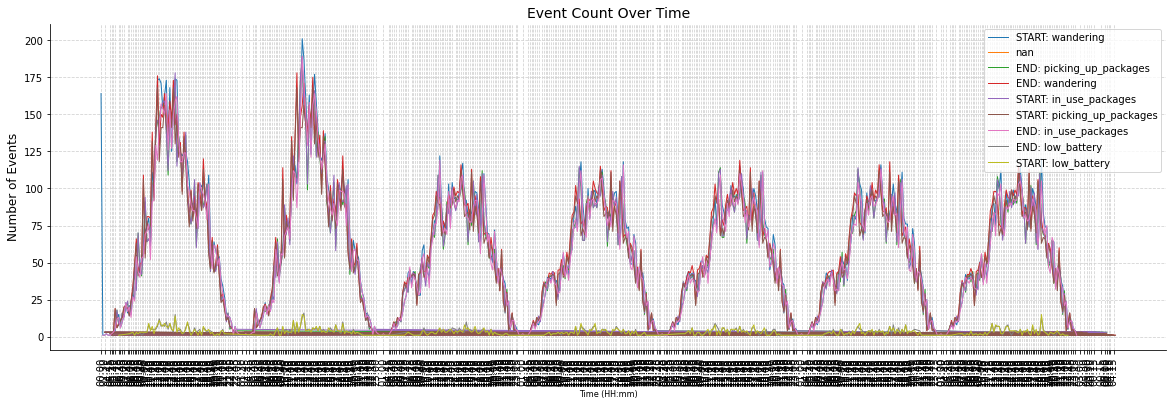

In [15]:
# Separate the data for each Event type
event_types = df_counts_activities['Event'].unique()
#event_types = ['START: low_battery']

# Create a plot
plt.figure(figsize=(20, 6))

# Plot lines for each Event type
for event_type in event_types:
    event_data = counts_activities[counts_activities['Event'] == event_type]
    plt.plot(event_data['x_datetime'], event_data['count'], label=event_type, linewidth=1)

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in counts_activities['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(counts_activities['x_datetime'][::8], tick_labels, rotation=90)

# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Event Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend
plt.legend(loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [16]:

# Format the datetime columns
df_bike['Time_ed'] = df_bike['Day'].astype(str) + ', ' + df_bike['start_time_ed'].dt.strftime('%H:%M:%S')

<AxesSubplot:title={'center':'Idle'}, xlabel='Time'>

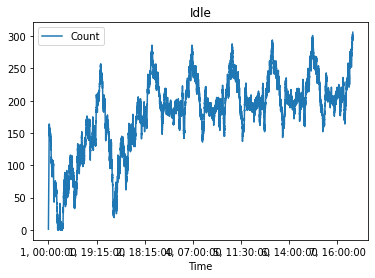

In [17]:
idle=df_bike.loc[(df_bike['Event']== 'END: wandering') | (df_bike['Event']== 'START: wandering')]
df=idle
count=0

idle_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: wandering':
        count=count-1
    elif event== 'START: wandering':
        count=count+1
    else:
        print('Event type error')
    idle_count.loc[i] = [row['Time_ed']] + [count]

idle_count.plot(x='Time', y='Count', kind='line',title="Idle")


<AxesSubplot:title={'center':'Use'}, xlabel='Time'>

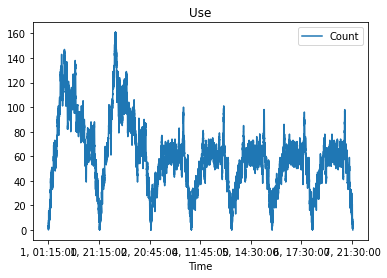

In [18]:
use=df_bike.loc[(df_bike['Event']== 'END: in_use_packages') | (df_bike['Event']== 'START: in_use_packages')]
df=use
count=0

use_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: in_use_packages':
        count=count-1
    elif event== 'START: in_use_packages':
        count=count+1
    else:
        print('Event type error')
    use_count.loc[i] = [row['Time_ed']] + [count]

use_count.plot(x='Time', y='Count', kind='line',title="Use")

<AxesSubplot:title={'center':'Charge'}, xlabel='Time'>

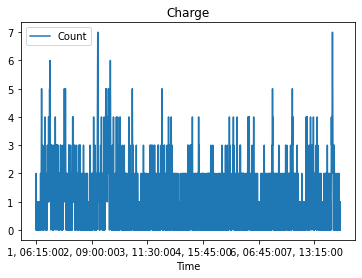

In [19]:
charging=df_bike.loc[(df_bike['Event']== 'END: low_battery') | (df_bike['Event']== 'START: low_battery')]
df=charging
count=0

charging_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: low_battery':
        count=count-1
    elif event== 'START: low_battery':
        count=count+1
    else:
        print('Event type error')
    charging_count.loc[i] = [row['Time_ed']] + [count]

charging_count.plot(x='Time', y='Count', kind='line',title="Charge")

<AxesSubplot:title={'center':'Pick-up'}, xlabel='Time'>

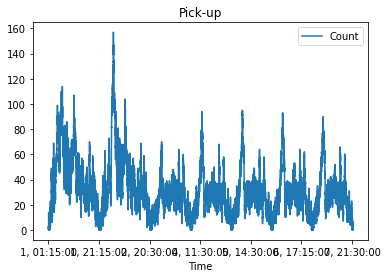

In [20]:
pick=df_bike.loc[(df_bike['Event']== 'END: picking_up_packages') | (df_bike['Event']== 'START: picking_up_packages')]
df=pick
count=0

pick_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    
    event = row["Event"]
    if event == 'END: picking_up_packages':
        count=count-1
    elif event== 'START: picking_up_packages':
        count=count+1
    else:
        print('Event type error')
    pick_count.loc[i] = [row['Time_ed']] + [count]

pick_count.plot(x='Time', y='Count', kind='line',title="Pick-up")

In [45]:
len(idle_count)

63196

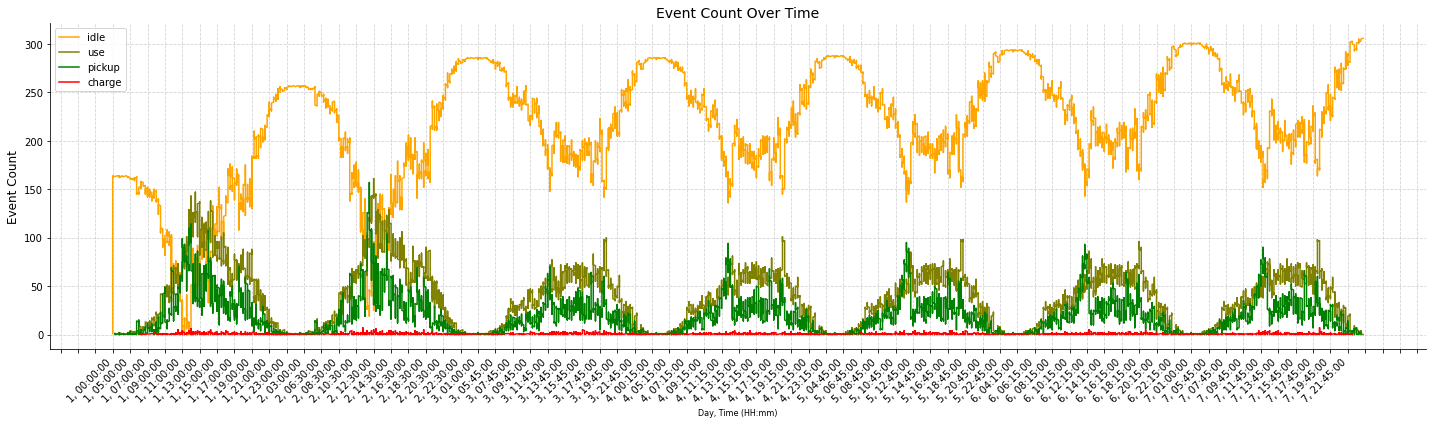

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have DataFrames named idle_count, use_count, pick_count, charging_count

# Create a plot
plt.figure(figsize=(20, 6))

# Extract the last 8 digits of x_datetime for tick labels
#tick_labels = [label[-8:-3] for label in idle_count['Time'][::8]]

# Multiple line plots
plt.plot('Time', 'Count', data=idle_count, color='orange', label="idle")
plt.plot('Time', 'Count', data=use_count, color='olive', label="use")
plt.plot('Time', 'Count', data=pick_count, color='green', label="pickup")
plt.plot('Time', 'Count', data=charging_count, color='red', label="charge")

# Set the axis labels and title
plt.xlabel('Day, Time (HH:mm)', fontsize=8)
plt.ylabel('Event Count', fontsize=12)
plt.title('Event Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show legend
plt.legend(loc='best')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)


# Show every 20th tick
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=99))

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [50]:
df_bike.columns

Index(['Cycle', 'Day', 'Time', 'NumBikes', 'Battery', 'AutDrivingSpeed',
       'MaxBiddingTime', 'PackBidCt', 'PackBidDist', 'PackBidQueue',
       'PersonBidCt', 'PersonBidDist', 'PersonBidQueue', 'Agent', 'Event',
       'Activity', 'Message', 'Start Time', 'End Time', 'Duration (min)',
       'Distance Traveled', 'Start Battery %', 'End Battery %',
       'Battery Gain %', 'start_time_ed', 'Time_ed'],
      dtype='object')

In [64]:
all_bikenames = df_bike['Agent'].unique()
last_rows_bikes  =  pd.DataFrame()

for bike in all_bikenames:
    bike_rows= df_bike[df_bike['Agent']==bike]
    last_row = bike_rows.iloc[-1]
    print(last_row)
    last_rows_bikes= last_rows_bikes.append(last_row)

Cycle                              20008
Day                                    7
Time                            22:44:00
NumBikes                             306
Battery                            70000
AutDrivingSpeed                        8
MaxBiddingTime                         0
PackBidCt                            100
PackBidDist                         0.01
PackBidQueue                           2
PersonBidCt                          200
PersonBidDist                       0.01
PersonBidQueue                         2
Agent                    autonomousBike0
Event                   START: wandering
Activity                               0
Message                              nil
Start Time                           NaN
End Time                             NaN
Duration (min)                       NaN
Distance Traveled                    NaN
Start Battery %                      NaN
End Battery %                        NaN
Battery Gain %                       NaN
start_time_ed   

In [65]:
len(last_rows_bikes)

306

In [69]:
last_rows_bikes.to_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/2023-08-07 04.00.00/last_bike_actions.csv')